In [7]:
import pandas as pd
import numpy as np
audata = pd.read_csv("RESULT_CU/cu_mean/cu2104_cu2105_final.csv", index_col=[0], parse_dates=[0])
audata

,id_A,ask_A,ask_vol_A,bid_A,bid_vol_A,last_A,id_B,ask_B,ask_vol_B,bid_B,bid_vol_B,last_B,spd_ask,spd_bid,spd_last,trading_date
date_time,,,,,,,,,,,,,,,,
2020-05-15 20:59:00.500,cu2104,43160.0,2.0,42260.0,4.0,43020.0,cu2105,43180.0,2.0,42290.0,2.0,43010.0,-30.0,-20.0,10.0,2020-05-18
2020-05-15 21:00:10.500,cu2104,43060.0,9.0,42340.0,4.0,43020.0,cu2105,43080.0,4.0,42300.0,1.0,43010.0,40.0,-20.0,10.0,2020-05-18
2020-05-15 21:00:21.000,cu2104,42940.0,4.0,42440.0,1.0,43020.0,cu2105,42960.0,3.0,42300.0,1.0,43010.0,140.0,-20.0,10.0,2020-05-18
2020-05-15 21:00:31.500,cu2104,42860.0,4.0,42580.0,1.0,43020.0,cu2105,42880.0,2.0,42300.0,1.0,43010.0,280.0,-20.0,10.0,2020-05-18
2020-05-15 21:00:42.500,cu2104,42960.0,6.0,42720.0,2.0,43020.0,cu2105,43170.0,11.0,42300.0,1.0,43010.0,420.0,-210.0,10.0,2020-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15 14:59:13.500,cu2104,67930.0,20.0,67450.0,40.0,67950.0,cu2105,67900.0,53.0,67890.0,7.0,67890.0,-440.0,30.0,60.0,2021-04-15
2021-04-15 14:59:21.500,cu2104,67930.0,20.0,67450.0,40.0,67950.0,cu2105,67890.0,1.0,67880.0,8.0,67880.0,-430.0,40.0,70.0,2021-04-15
2021-04-15 14:59:33.500,cu2104,67930.0,20.0,67450.0,40.0,67950.0,cu2105,67890.0,8.0,67880.0,11.0,67880.0,-430.0,40.0,70.0,2021-04-15


In [12]:
import datetime
start_date = datetime.datetime(2021, 3, 1)
end_date = datetime.datetime(2021, 4, 15)
data_all = audata.loc[audata.index > start_date]
data_all = data_all.loc[data_all.index < end_date]

#删除为0的行，排除涨跌停导致价格为0
data_all.drop( index = data_all.ask_A[data_all.ask_A == 0].index,inplace = True)
data_all.drop( index = data_all.bid_A[data_all.bid_A == 0].index,inplace = True)
data_all.drop( index = data_all.ask_B[data_all.ask_B == 0].index,inplace = True)
data_all.drop( index = data_all.bid_B[data_all.bid_B == 0].index,inplace = True)

pd_date_list = pd.DataFrame()
pd_date_list['time_stamp'] = pd.to_datetime(data_all['trading_date'])
# normalize, count values, convert to dataframe
pd_date_list = pd_date_list['time_stamp'].dt.normalize().value_counts().to_frame().reset_index()
# rename columns
pd_date_list.columns = ['time_stamp', 'count']
pd_date_list.sort_values(by='time_stamp',inplace=True)
pd_date_list = pd_date_list.reset_index()
pd_date_list.drop(columns='index',inplace=True)
pd_date_list


,time_stamp,count
0,2021-03-01,1240
1,2021-03-02,2542
2,2021-03-03,2491
3,2021-03-05,2602
4,2021-03-08,2570
5,2021-03-09,2570
6,2021-03-10,2512
7,2021-03-11,2452
8,2021-03-12,2489
9,2021-03-15,2462


In [13]:
import statsmodels.api as sm
import datetime
holding = False
direction = None  # "a-b", "b-a"
stop_event = "none"
enter_record = []
out_record = []

pure_pnl = []
trading_cost = []
pnl = []
cost_rate = 0.5 / 10000
delta_days = 1
K = 0
beta = 0
data_all['trading_date']  =  pd.to_datetime(data_all['trading_date']) #处理交易日时刻
#取最近5天数据
for date_index in range(0,len(pd_date_list) - delta_days):

    start_time = pd_date_list['time_stamp'].iloc[date_index]
    end_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]
    data = data_all[(data_all['trading_date'] >= start_time) & (data_all['trading_date'] < end_time)]

    start_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]
    end_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]  + pd.Timedelta("1 day")
    test_data = data_all[(data_all['trading_date'] >= start_time) & (data_all['trading_date'] < end_time)]

    model = sm.OLS(data.last_A, data.last_B).fit()
    

    beta = model.params['last_B']


    eps = data.last_A - data.last_B * beta
    eps2 = test_data.last_A - test_data.last_B * beta
    eps2_ask = test_data.bid_A - test_data.ask_B * beta
    eps2_bid = test_data.ask_A - test_data.bid_B * beta

    Spread = data.last_A - data.last_B
    Spread2 = test_data.last_A - test_data.last_B
    Spread2_ask = test_data.bid_A - test_data.ask_B
    Spread2_bid = test_data.ask_A - test_data.bid_B

    print(" ")
    print('test_day:',start_time)
    print(model.params)
    # best_k = find_best_k(eps,Spread)

    #进入交易
    # if K == 0:
    #     K = best_k

    # K = best_k * 0.4 + K * 0.6
    K = 0.8
    up_threshold =  K * np.std(eps)
    # up_threshold = 10
    down_threshold = - up_threshold

    # temp = np.std(eps) * 5
    # up_threshold_stop = temp * 0.4 + up_threshold_stop *0.6
    up_threshold_stop = np.std(eps) * 20
    biggest_lost = -100
    # if up_threshold_stop < 60:
    #     up_threshold_stop = 60
    # if up_threshold_stop > 200:
    #     up_threshold_stop = 200
    down_threshold_stop = -up_threshold_stop


    print('beta:',beta)
    print('阈值：',up_threshold)
    print('止损点：',up_threshold_stop)

    for i, v in enumerate(eps2_ask.values):
        #交易时间点判断:去除开盘前10分钟和收盘前十分钟
        start_time1 = datetime.time(21,10,0) #夜盘开盘
        start_time2 = datetime.time(9,10,0) #早上开盘

        end_time1 = datetime.time(0,50,0) #夜盘收盘
        end_time2 = datetime.time(14,50,0) #下午收盘
        
        if (eps2_ask.index[i].time() > start_time1 or eps2_ask.index[i].time() < end_time1) or \
            (eps2_ask.index[i].time() > start_time2 and eps2_ask.index[i].time() < end_time2):

            ask_price = eps2_ask[i]
            bid_price = eps2_bid[i]
            if not holding:
                # 判断进场条件
                if ask_price > up_threshold and stop_event != 'up_stop':
                    holding = True
                    stop_event = "none"
                    direction = 'b-a'
                    print(Spread2_ask.index[i],'b-a进场', Spread2_ask[i], ask_price,'--',len(enter_record))
                    enter_record.append((Spread2_ask[i], ask_price))
                elif bid_price < down_threshold and stop_event != 'down_stop':
                    holding = True
                    stop_event = "none"
                    direction = 'a-b'
                    print(Spread2_bid.index[i],'a-b进场', Spread2_bid[i], bid_price,'--',len(enter_record))
                    enter_record.append((Spread2_bid[i], bid_price))
                    
            elif holding:
                # 判断离场条件
                if direction == 'a-b' and ask_price > down_threshold + 10:
                    holding = False
                    print(Spread2_ask.index[i],'a-b出场', Spread2_ask[i], ask_price)
                    out_record.append((Spread2_ask[i], ask_price))
                    
                    out_price = Spread2_ask[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (out_price - last_enter_price)
                    single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1

                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)
                    
                    
                elif direction =='b-a' and bid_price < up_threshold - 10:
                    holding = False
                    print(Spread2_bid.index[i],'b-a出场', Spread2_bid[i], bid_price)
                    out_record.append((Spread2_bid[i], bid_price))
                    out_price = Spread2_bid[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (last_enter_price - out_price)
                    single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1        
                    
                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                #判断止损条件
                elif direction == 'a-b' and ask_price < down_threshold_stop:
                    holding = False
                    stop_event = 'down_stop'
                    print(Spread2_ask.index[i],'a-b止损出场', Spread2_ask[i], ask_price)
                    out_record.append((Spread2_ask[i], ask_price))
                    
                    out_price = Spread2_ask[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (out_price - last_enter_price)
                    single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1

                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)
                    
                    
                elif direction =='b-a' and bid_price > up_threshold_stop:
                    holding = False
                    stop_event = 'up_stop'
                    print(Spread2_bid.index[i],'b-a止损出场', Spread2_bid[i], bid_price)
                    out_record.append((Spread2_bid[i], bid_price))
                    out_price = Spread2_bid[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (last_enter_price - out_price)
                    single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1         
                    
                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)
                else: #判断最大亏损有没有达到阈值
                    if direction == 'a-b':
                        out_price = Spread2_ask[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (out_price - last_enter_price)
                        if single_ret < biggest_lost:
                            holding = False
                            stop_event = 'down_stop'
                            print(Spread2_ask.index[i],'a-b收益止损出场', Spread2_ask[i], ask_price)
                            out_record.append((Spread2_ask[i], ask_price))
                            single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1
                            pure_pnl.append(single_ret)
                            trading_cost.append(single_cost)
                            pnl.append(single_ret - single_cost)
                    elif direction =='b-a':
                        out_price = Spread2_bid[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (last_enter_price - out_price)
                        if single_ret < biggest_lost:
                            holding = False
                            stop_event = 'up_stop'
                            print(Spread2_bid.index[i],'b-a收益止损出场', Spread2_bid[i], bid_price)
                            out_record.append((Spread2_bid[i], bid_price))
                            single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1          
                            
                            pure_pnl.append(single_ret)
                            trading_cost.append(single_cost)
                            pnl.append(single_ret - single_cost)

            
if holding:
    print('还有持仓，强平',Spread2_bid[i], bid_price)
    if direction == 'a-b':
        ret = (Spread2_ask[-1] - enter_record[-1][0])
    else:
        ret = (enter_record[-1][0] - Spread2_bid[-1])
    
    single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1
    pure_pnl.append(ret)
    trading_cost.append(single_cost)
    pnl.append(ret - single_cost)


 
test_day: 2021-03-02 00:00:00
last_B    0.998848
dtype: float64
beta: 0.9988483513019726
阈值： 6.622897719180758
止损点： 165.57244297951894
2021-03-01 21:19:36 b-a进场 -70.0 7.6787046819517855 -- 0
2021-03-01 22:28:12.500000 b-a出场 -90.0 -12.586174518597545
2021-03-01 22:28:59 a-b进场 -90.0 -12.586174518597545 -- 1
2021-03-01 22:47:15 a-b出场 -70.0 7.5635398121521575
2021-03-01 22:58:16 a-b进场 -90.0 -12.551625057662022 -- 2
2021-03-02 09:17:18 a-b出场 -70.0 7.1719792548101395
2021-03-02 09:17:40 b-a进场 -70.0 7.1719792548101395 -- 3
2021-03-02 09:35:28 b-a出场 -80.0 -3.438394555138075
2021-03-02 09:55:12.500000 a-b进场 -90.0 -13.542042937959195 -- 4
2021-03-02 10:00:20 a-b出场 -70.0 6.2161108354484895
2021-03-02 14:16:09.500000 b-a进场 -50.0 26.492506522976328 -- 5
2021-03-02 14:24:56 b-a出场 -90.0 -13.173515354588744
2021-03-02 14:29:18.500000 b-a进场 -70.0 6.734352749568643 -- 6
 
test_day: 2021-03-03 00:00:00
last_B    0.998827
dtype: float64
beta: 0.9988274545215197
阈值： 7.5472529483682145
止损点： 188.6813237092

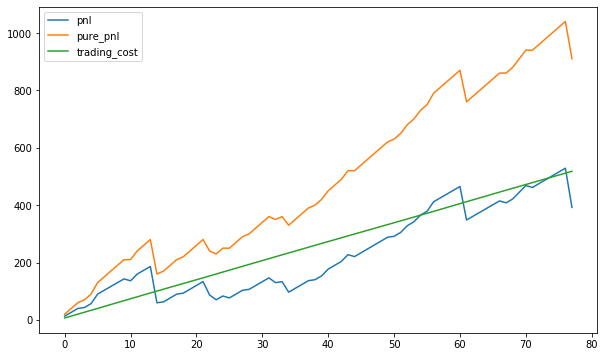

392.053

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(np.array(pnl).cumsum(), label='pnl')
plt.plot(np.array(pure_pnl).cumsum(), label='pure_pnl')
plt.plot(np.array(trading_cost).cumsum(), label='trading_cost')
plt.legend()
plt.show()
np.array(pnl).sum()

In [84]:
import statsmodels.api as sm
import datetime
K_options = np.arange(0.1, 2.5, 0.1)
res_test = []
for K in K_options:

    holding = False
    direction = None  # "a-b", "b-a"
    stop_event = "none"
    enter_record = []
    out_record = []

    pure_pnl = []
    trading_cost = []
    pnl = []
    cost_rate = 0.5 / 10000
    delta_days = 1
    beta = 0
    data_all['trading_date']  =  pd.to_datetime(data_all['trading_date']) #处理交易日时刻
    #取最近5天数据
    for date_index in range(0,len(pd_date_list) - delta_days):

        start_time = pd_date_list['time_stamp'].iloc[date_index]
        end_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]
        data = data_all[(data_all['trading_date'] >= start_time) & (data_all['trading_date'] < end_time)]

        start_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]
        end_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]  + pd.Timedelta("1 day")
        test_data = data_all[(data_all['trading_date'] >= start_time) & (data_all['trading_date'] < end_time)]

        model = sm.OLS(data.last_A, data.last_B).fit()
        

        beta = model.params['last_B']


        eps = data.last_A - data.last_B * beta
        eps2 = test_data.last_A - test_data.last_B * beta
        eps2_ask = test_data.bid_A - test_data.ask_B * beta
        eps2_bid = test_data.ask_A - test_data.bid_B * beta

        Spread = data.last_A - data.last_B
        Spread2 = test_data.last_A - test_data.last_B
        Spread2_ask = test_data.bid_A - test_data.ask_B
        Spread2_bid = test_data.ask_A - test_data.bid_B

        print(" ")
        print('test_day:',start_time)
        print(model.params)
        # best_k = find_best_k(eps,Spread)

        #进入交易
        # if K == 0:
        #     K = best_k

        # K = best_k * 0.4 + K * 0.6
        # K = 0.5
        up_threshold =  K * np.std(eps)
        # up_threshold = 10
        down_threshold = - up_threshold

        # temp = np.std(eps) * 5
        # up_threshold_stop = temp * 0.4 + up_threshold_stop *0.6
        up_threshold_stop = np.std(eps) * 20
        biggest_lost = -100
        # if up_threshold_stop < 60:
        #     up_threshold_stop = 60
        # if up_threshold_stop > 200:
        #     up_threshold_stop = 200
        down_threshold_stop = -up_threshold_stop


        print('beta:',beta)
        print('阈值：',up_threshold)
        print('止损点：',up_threshold_stop)

        for i, v in enumerate(eps2.values):
            #交易时间点判断:去除开盘前10分钟和收盘前十分钟
            start_time1 = datetime.time(2,10,0)
            start_time2 = datetime.time(14,10,0)

            end_time1 = datetime.time(5,50,0)
            end_time2 = datetime.time(19,50,0)
            
            if (eps2_ask.index[i].time() > start_time1 and eps2_ask.index[i].time() < end_time1) or \
                (eps2_ask.index[i].time() > start_time2 and eps2_ask.index[i].time() < end_time2):

                ask_price = eps2_ask[i]
                bid_price = eps2_bid[i]
                if not holding:
                    # 判断进场条件
                    if ask_price > up_threshold and stop_event != 'up_stop':
                        holding = True
                        stop_event = "none"
                        direction = 'b-a'
                        print(len(enter_record),Spread2_ask.index[i],'b-a进场', Spread2_ask[i], ask_price)
                        enter_record.append((Spread2_ask[i], ask_price))
                    elif bid_price < down_threshold and stop_event != 'down_stop':
                        holding = True
                        stop_event = "none"
                        direction = 'a-b'
                        print(len(enter_record),Spread2_bid.index[i],'a-b进场', Spread2_bid[i], bid_price)
                        enter_record.append((Spread2_bid[i], bid_price))
                        
                elif holding:
                    # 判断离场条件
                    if direction == 'a-b' and ask_price > down_threshold + 10:
                        holding = False
                        print(Spread2_ask.index[i],'a-b出场', Spread2_ask[i], ask_price)
                        out_record.append((Spread2_ask[i], ask_price))
                        
                        out_price = Spread2_ask[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (out_price - last_enter_price)
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1 

                        pure_pnl.append(single_ret)
                        trading_cost.append(single_cost)
                        pnl.append(single_ret - single_cost)
                        
                        
                    elif direction =='b-a' and bid_price < up_threshold - 10:
                        holding = False
                        print(Spread2_bid.index[i],'b-a出场', Spread2_bid[i], bid_price)
                        out_record.append((Spread2_bid[i], bid_price))
                        out_price = Spread2_bid[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (last_enter_price - out_price)
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1          
                        
                        pure_pnl.append(single_ret)
                        trading_cost.append(single_cost)
                        pnl.append(single_ret - single_cost)

                    #判断止损条件
                    elif direction == 'a-b' and ask_price < down_threshold_stop:
                        holding = False
                        stop_event = 'down_stop'
                        print(Spread2_ask.index[i],'a-b止损出场', Spread2_ask[i], ask_price)
                        out_record.append((Spread2_ask[i], ask_price))
                        
                        out_price = Spread2_ask[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (out_price - last_enter_price)
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1 

                        pure_pnl.append(single_ret)
                        trading_cost.append(single_cost)
                        pnl.append(single_ret - single_cost)
                        
                        
                    elif direction =='b-a' and bid_price > up_threshold_stop:
                        holding = False
                        stop_event = 'up_stop'
                        print(Spread2_bid.index[i],'b-a止损出场', Spread2_bid[i], bid_price)
                        out_record.append((Spread2_bid[i], bid_price))
                        out_price = Spread2_bid[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (last_enter_price - out_price)
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1          
                        
                        pure_pnl.append(single_ret)
                        trading_cost.append(single_cost)
                        pnl.append(single_ret - single_cost)
                    else: #判断最大亏损有没有达到阈值
                        if direction == 'a-b':
                            out_price = Spread2_ask[i]
                            last_enter_price = enter_record[-1][0]
                            single_ret = (out_price - last_enter_price)
                            if single_ret < biggest_lost:
                                holding = False
                                stop_event = 'down_stop'
                                print(Spread2_ask.index[i],'a-b收益止损出场', Spread2_ask[i], ask_price)
                                out_record.append((Spread2_ask[i], ask_price))
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1 
                                pure_pnl.append(single_ret)
                                trading_cost.append(single_cost)
                                pnl.append(single_ret - single_cost)
                        elif direction =='b-a':
                            out_price = Spread2_bid[i]
                            last_enter_price = enter_record[-1][0]
                            single_ret = (last_enter_price - out_price)
                            if single_ret < biggest_lost:
                                holding = False
                                stop_event = 'up_stop'
                                print(Spread2_bid.index[i],'b-a收益止损出场', Spread2_bid[i], bid_price)
                                out_record.append((Spread2_bid[i], bid_price))
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1          
                                
                                pure_pnl.append(single_ret)
                                trading_cost.append(single_cost)
                                pnl.append(single_ret - single_cost)

                
    if holding:
        print('还有持仓，强平',Spread2_bid[i], bid_price)
        if direction == 'a-b':
            ret = (Spread2_ask[-1] - enter_record[-1][0])
        else:
            ret = (enter_record[-1][0] - Spread2_bid[-1])
        
        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 1
        pure_pnl.append(ret)
        trading_cost.append(single_cost)
        pnl.append(ret - single_cost)


    res_test.append([K,np.array(pnl).sum()])


1-05-12 19:01:39 b-a出场 -200.0 7.001767342138919
 
test_day: 2021-05-13 00:00:00
last_B    0.997544
dtype: float64
beta: 0.9975441186872447
阈值： 26.726216348526055
止损点： 254.53539379548624
10 2021-05-13 19:46:34.500000 b-a进场 -160.0 27.38374416323495
 
test_day: 2021-05-14 00:00:00
last_B    0.997609
dtype: float64
beta: 0.9976091619337791
阈值： 30.29089718458848
止损点： 288.48473509131884
2021-05-14 02:29:24.500000 b-a出场 -180.0 0.914716470928397
 
test_day: 2021-05-17 00:00:00
last_B    0.997726
dtype: float64
beta: 0.9977256784688601
阈值： 25.75340845212681
止损点： 245.270556686922
 
test_day: 2021-05-18 00:00:00
last_B    0.997832
dtype: float64
beta: 0.9978315428131745
阈值： 25.5872671228417
止损点： 243.68825831277806
11 2021-05-18 04:13:07.500000 a-b进场 -190.0 -25.891160101047717
2021-05-18 05:27:35.500000 a-b出场 -160.0 3.9353633240098134
12 2021-05-18 18:33:05.500000 b-a进场 -140.0 25.670129073463613
2021-05-18 18:48:37 b-a出场 -160.0 5.474967926653335
13 2021-05-18 19:32:05 b-a进场 -140.0 25.6267599297279

In [85]:
res_test

[[0.1, -280.79600000000005],
 [0.2, -436.94699999999995],
 [0.30000000000000004, -340.76800000000003],
 [0.4, -205.1075],
 [0.5, 1.5169999999999728],
 [0.6, 273.511],
 [0.7000000000000001, 335.3695000000001],
 [0.8, 430.64],
 [0.9, 625.4545],
 [1.0, 606.9675],
 [1.1, 588.4755000000001],
 [1.2000000000000002, 560.9735000000001],
 [1.3000000000000003, 614.4495],
 [1.4000000000000001, 536.5515],
 [1.5000000000000002, 519.0319999999999],
 [1.6, 420.976],
 [1.7000000000000002, 360.38499999999993],
 [1.8000000000000003, 302.91600000000005],
 [1.9000000000000001, 300.29749999999996],
 [2.0, 320.7605],
 [2.1, 255.36149999999995],
 [2.2, 167.4305],
 [2.3000000000000003, 167.4245],
 [2.4000000000000004, 177.1155]]

In [ ]:
start_time = pd_date_list['time_stamp'].iloc[34]
end_time = pd_date_list['time_stamp'].iloc[34] + pd.Timedelta("1 day")
data = data_all[(data_all.index >= start_time) & (data_all.index <= end_time)]

model = sm.OLS(data.last_A, data.last_B).fit()
print(data)
print(model.params)

beta = model.params['last_B']

eps = data.last_A - data.last_B * beta

Spread = data.last_A - data.last_B
best_k = find_best_k(eps,Spread)

#进入交易

K_use = best_k * 0.4 + K * 0.6
up_threshold =  K_use * np.std(eps)
down_threshold = - up_threshold
print(K_use)

In [ ]:
up_threshold